In [4]:
import geopandas as gpd
from ipywidgets import interactive
from matplotlib import pyplot as plt

In [5]:
import pandas as pd
import getpass, os
os.environ['PSQL_USER']='dengueadmin'
os.environ['PSQL_HOST']='localhost'
os.environ['PSQL_DB']='dengue'
os.environ['PSQL_PASSWORD']=getpass.getpass("Enter the database password: ")

Enter the database password: ········


In [8]:
os.chdir('..')
from infodenguepredict.data.infodengue import get_temperature_data, get_alerta_table, get_tweet_data
%matplotlib inline

## Fetching data from Infodengue
We can download the data from a full state. Let's pick Goiás.

In [9]:
estados = {'RJ': 'Rio de Janeiro', 'ES': 'Espírito Santo', 'PR': 'Paraná', 'CE': 'Ceará',
               'MA': 'Maranhão', 'MG': 'Minas Gerais', 'SC': 'Santa Catarina', 'GO': 'Goiás',
               'SP': 'São Paulo', 'RS': 'Rio Grande do Sul', 'BA': 'Bahia',
                'SE': 'Sergipe', 'AL': 'Alagoas', 'PB': 'Paraíba', 'PE': 'Pernambuco',
                'TO': 'Tocantins', 'PI': 'Piauí', 'RN': 'Rio Grande do Norte',
               }
go = get_alerta_table(state='GO', doenca='dengue')

OperationalError: (psycopg2.OperationalError) connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused
	Is the server running on that host and accepting TCP/IP connections?

(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [5]:
go

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,...,pop,tempmin,umidmax,receptivo,transmissao,nivel_inc,umidmed,umidmin,tempmed,tempmax
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2015-12-13,201550,0.0,0,0,0,5219258,0.000000,0.0000,0,1,...,5523.0,21.0,87.0,0,0.0,0,None,None,None,None
2015-12-20,201551,0.0,0,0,0,5219258,0.000000,0.0000,0,1,...,5523.0,22.0,81.0,0,0.0,0,None,None,None,None
2015-12-27,201552,0.0,0,0,0,5219258,0.000000,0.0000,0,1,...,5523.0,21.0,88.0,0,0.0,0,None,None,None,None
2016-01-03,201601,2.0,2,2,2,5219258,0.977983,36.2122,0,1,...,5523.0,22.0,89.0,1,0.0,0,None,None,None,None
2016-01-10,201602,1.0,1,1,1,5219258,0.688757,18.1061,0,1,...,5523.0,21.0,91.0,1,0.0,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-01,201544,0.0,0,0,0,5219258,0.000000,0.0000,0,1,...,5523.0,21.0,88.0,0,0.0,0,None,None,None,None
2015-11-08,201545,0.0,0,0,0,5219258,0.000000,0.0000,0,1,...,5523.0,21.0,79.0,0,0.0,0,None,None,None,None
2015-11-15,201546,0.0,0,0,0,5219258,0.000000,0.0000,0,1,...,5523.0,22.0,88.0,0,0.0,0,None,None,None,None


In [6]:
import geopandas as gpd
import geobr

In [7]:
municipios = geobr.read_municipality(code_muni='all')
municipios

,code_muni,name_muni,code_state,abbrev_state,geometry
0,1100015.0,Alta Floresta D'oeste,11.0,RO,"MULTIPOLYGON (((-62.24620 -11.90149, -62.24151..."
1,1100023.0,Ariquemes,11.0,RO,"MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ..."
2,1100031.0,Cabixi,11.0,RO,"MULTIPOLYGON (((-60.52408 -13.32137, -60.37161..."
3,1100049.0,Cacoal,11.0,RO,"MULTIPOLYGON (((-61.42679 -11.11376, -61.42900..."
4,1100056.0,Cerejeiras,11.0,RO,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603..."
...,...,...,...,...,...
5562,5222005.0,Vianópolis,52.0,GO,"POLYGON ((-48.54164 -16.74126, -48.53274 -16.7..."
5563,5222054.0,Vicentinópolis,52.0,GO,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6..."
5564,5222203.0,Vila Boa,52.0,GO,"POLYGON ((-46.97635 -14.93112, -46.94801 -15.0..."
5565,5222302.0,Vila Propício,52.0,GO,"POLYGON ((-48.86700 -15.09735, -48.86191 -15.0..."


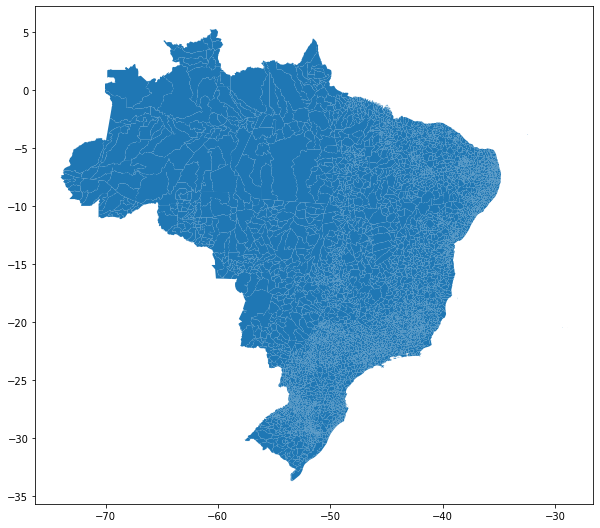

In [8]:
municipios['code_muni'] = municipios.code_muni.astype('int')
municipios.plot(figsize=(10,10));

In [9]:
goias = pd.merge(go.reset_index(), municipios,how='left', left_on='municipio_geocodigo', right_on='code_muni')
goias

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,...,nivel_inc,umidmed,umidmin,tempmed,tempmax,code_muni,name_muni,code_state,abbrev_state,geometry
0,2015-12-13,201550,0.0,0,0,0,5219258,0.000000,0.0000,0,...,0,None,None,None,None,5219258,Santa Fé De Goiás,52.0,GO,"POLYGON ((-51.24211 -15.67733, -51.17279 -15.6..."
1,2015-12-20,201551,0.0,0,0,0,5219258,0.000000,0.0000,0,...,0,None,None,None,None,5219258,Santa Fé De Goiás,52.0,GO,"POLYGON ((-51.24211 -15.67733, -51.17279 -15.6..."
2,2015-12-27,201552,0.0,0,0,0,5219258,0.000000,0.0000,0,...,0,None,None,None,None,5219258,Santa Fé De Goiás,52.0,GO,"POLYGON ((-51.24211 -15.67733, -51.17279 -15.6..."
3,2016-01-03,201601,2.0,2,2,2,5219258,0.977983,36.2122,0,...,0,None,None,None,None,5219258,Santa Fé De Goiás,52.0,GO,"POLYGON ((-51.24211 -15.67733, -51.17279 -15.6..."
4,2016-01-10,201602,1.0,1,1,1,5219258,0.688757,18.1061,0,...,0,None,None,None,None,5219258,Santa Fé De Goiás,52.0,GO,"POLYGON ((-51.24211 -15.67733, -51.17279 -15.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156155,2015-11-01,201544,0.0,0,0,0,5219258,0.000000,0.0000,0,...,0,None,None,None,None,5219258,Santa Fé De Goiás,52.0,GO,"POLYGON ((-51.24211 -15.67733, -51.17279 -15.6..."
156156,2015-11-08,201545,0.0,0,0,0,5219258,0.000000,0.0000,0,...,0,None,None,None,None,5219258,Santa Fé De Goiás,52.0,GO,"POLYGON ((-51.24211 -15.67733, -51.17279 -15.6..."
156157,2015-11-15,201546,0.0,0,0,0,5219258,0.000000,0.0000,0,...,0,None,None,None,None,5219258,Santa Fé De Goiás,52.0,GO,"POLYGON ((-51.24211 -15.67733, -51.17279 -15.6..."
156158,2015-11-29,201548,0.0,0,0,0,5219258,0.000000,0.0000,0,...,0,None,None,None,None,5219258,Santa Fé De Goiás,52.0,GO,"POLYGON ((-51.24211 -15.67733, -51.17279 -15.6..."


In [10]:
goias = gpd.GeoDataFrame(goias)

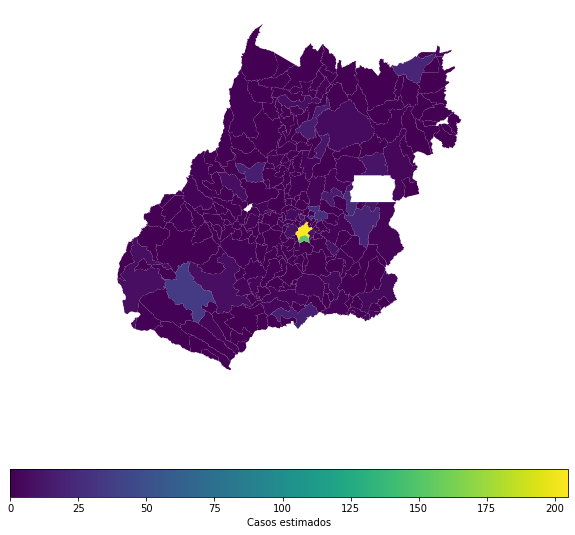

In [11]:
ax = goias[goias.SE==202144].plot(figsize=(10,10),
                             column='casos_est',
                             legend=True,
                             legend_kwds={'label': "Casos estimados",
                                            'orientation': "horizontal"},

                             );
ax.set_axis_off();

## Building the dashboard

In [12]:
from functools import lru_cache

In [62]:
@lru_cache(maxsize=27)
def get_dados(sigla='PR'):
    df = get_alerta_table(state=sigla, doenca='dengue')
    dados = pd.merge(df.reset_index(), municipios,how='left', left_on='municipio_geocodigo', right_on='code_muni')
    return gpd.GeoDataFrame(dados)

def get_mapa(sigla, data):
    df = get_dados(sigla)
    fig = plt.Figure(figsize=(10, 10))
    ax = fig.subplots()
    df[df.data_iniSE==data].plot(ax=ax,
         column='casos_est',
         legend=True,
         legend_kwds={'label': "Casos estimados",
                        'orientation': "horizontal"},
                             );
    return fig

def get_series(sigla,nome_mun):
    df = get_dados(sigla)
    df = df[df.municipio_nome==nome_mun]
    df.set_index('data_iniSE', inplace=True)
    fig = plt.Figure(figsize=(10, 10))
    ax = fig.subplots()
    ax.set_title(nome_mun)
    df.casos_est.plot(ax=ax)
    return fig
    

In [63]:
pn.extension(sizing_mode="stretch_width")

In [64]:
state = pn.widgets.Select(name="Estado",value='RJ', options=list(estados.keys()))

In [65]:
city = pn.widgets.Select(name="Municipio", options=list(set(get_dados(state.value).municipio_nome)))

In [66]:
date_slider = pn.widgets.DateSlider(name='Data', start=get_dados(state.value).data_iniSE.min(), end=get_dados(state.value).data_iniSE.max())

In [87]:
plot_column = pn.Column('Plots', sizing_mode="stretch_width", height_policy='min')
plot_column.append(get_mapa(state.value, date_slider.value))
plot_column.append(get_series(state.value,city.value));

<Figure size 432x288 with 0 Axes>

In [88]:
Dash = pn.Row(pn.Column(state, city, date_slider, sizing_mode="fixed", width=300),
       plot_column, sizing_mode="stretch_width")


In [92]:
def update(event):
    Dash[1].objects[0]=get_mapa(state.value, date_slider.value)
    return fig
def update_series(event):
    Dash[1].objects[1]=get_series(city.value)
    

state.param.watch(update, 'value')
date_slider.param.watch(update, 'value')
city.param.watch(update_series, 'value');

Traceback (most recent call last):
 File "/usr/local/lib/python3.9/dist-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/usr/local/lib/python3.9/dist-packages/panel/viewable.py", line 273, in _on_msg
 doc.unhold()
 File "/usr/local/lib/python3.9/dist-packages/bokeh/document/document.py", line 799, in unhold
 self.callbacks.unhold()
 File "/usr/local/lib/python3.9/dist-packages/bokeh/document/callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "/usr/local/lib/python3.9/dist-packages/bokeh/document/callbacks.py", line 373, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "/usr/local/lib/python3.9/dist-packages/bokeh/document/callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "/usr/local/lib/python3.9/dist-packages/bokeh/util/callback_manager.py", line 191, in invoke
 callback(attr, old, new)
 File "/usr/local/lib/python3.9/dist-packages/panel/reactive.py", line 302, in _comm_change
 self._process_events({attr: new})
 File "/usr/local/lib/python3.9/dist-packages/panel/reactive.py", line 263, in _process_events
 self.param.set_param(**self_events)
 File "/usr/local/lib/python3.9/dist-packages/param/parameterized.py", line 1904, in set_param
 return self_.update(kwargs)
 File "/usr/local/lib/python3.9/dist-packages/param/parameterized.py", line 1877, in update
 self_._batch_call_watchers()
 File "/usr/local/lib/python3.9/dist-packages/param/parameterized.py", line 2038, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/usr/local/lib/python3.9/dist-packages/param/parameterized.py", line 2000, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/tmp/ipykernel_704430/1964785257.py", line 5, in update_series
 row[1].object[1]=get_series(city.value)
TypeError: get_series() missing 1 required positional argument: 'nome_mun'
 


 Traceback (most recent call last):
 File "/usr/local/lib/python3.9/dist-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/usr/local/lib/python3.9/dist-packages/panel/viewable.py", line 273, in _on_msg
 doc.unhold()
 File "/usr/local/lib/python3.9/dist-packages/bokeh/document/document.py", line 799, in unhold
 self.callbacks.unhold()
 File "/usr/local/lib/python3.9/dist-packages/bokeh/document/callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "/usr/local/lib/python3.9/dist-packages/bokeh/document/callbacks.py", line 373, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "/usr/local/lib/python3.9/dist-packages/bokeh/document/callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "/usr/local/lib/python3.9/dist-packages/bokeh/util/callback_manager.py", line 191, in invoke
 callback(attr, old, new)
 File "/usr/local/lib/python3.9/dist-packages/panel/reactive.py", line 302, in _comm_change
 self._process_events({attr: new})
 File "/usr/local/lib/python3.9/dist-packages/panel/reactive.py", line 263, in _process_events
 self.param.set_param(**self_events)
 File "/usr/local/lib/python3.9/dist-packages/param/parameterized.py", line 1904, in set_param
 return self_.update(kwargs)
 File "/usr/local/lib/python3.9/dist-packages/param/parameterized.py", line 1877, in update
 self_._batch_call_watchers()
 File "/usr/local/lib/python3.9/dist-packages/param/parameterized.py", line 2038, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/usr/local/lib/python3.9/dist-packages/param/parameterized.py", line 2000, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/tmp/ipykernel_704430/1964785257.py", line 2, in update
 row[1].object[0]=get_mapa(state.value, date_slider.value)
TypeError: 'Figure' object does not support item assignment
 


 Traceback (most recent call last):
 File "/usr/local/lib/python3.9/dist-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/usr/local/lib/python3.9/dist-packages/panel/viewable.py", line 273, in _on_msg
 doc.unhold()
 Fil

Row(sizing_mode='stretch_width')
    [0] Column(sizing_mode='fixed', width=300)
        [0] Select(name='Estado', options=['RJ', 'ES', 'PR', ...], sizing_mode='stretch_width', value='MG')
        [1] Select(name='Municipio', options=['Armação dos Búzios', ...], sizing_mode='stretch_width', value='São Francisco d...)
        [2] DateSlider(end=Timestamp('2022-04-03 0..., name='Data', sizing_mode='stretch_width', start=Timestamp('2010-01-03 0..., value=Timestamp('2010-01-03 0...)
    [1] Column(height_policy='min', sizing_mode='stretch_width')
        [0] Markdown(str, sizing_mode='stretch_width')
        [1] Matplotlib(Figure, sizing_mode='stretch_width')
        [2] Matplotlib(Figure, sizing_mode='stretch_width')
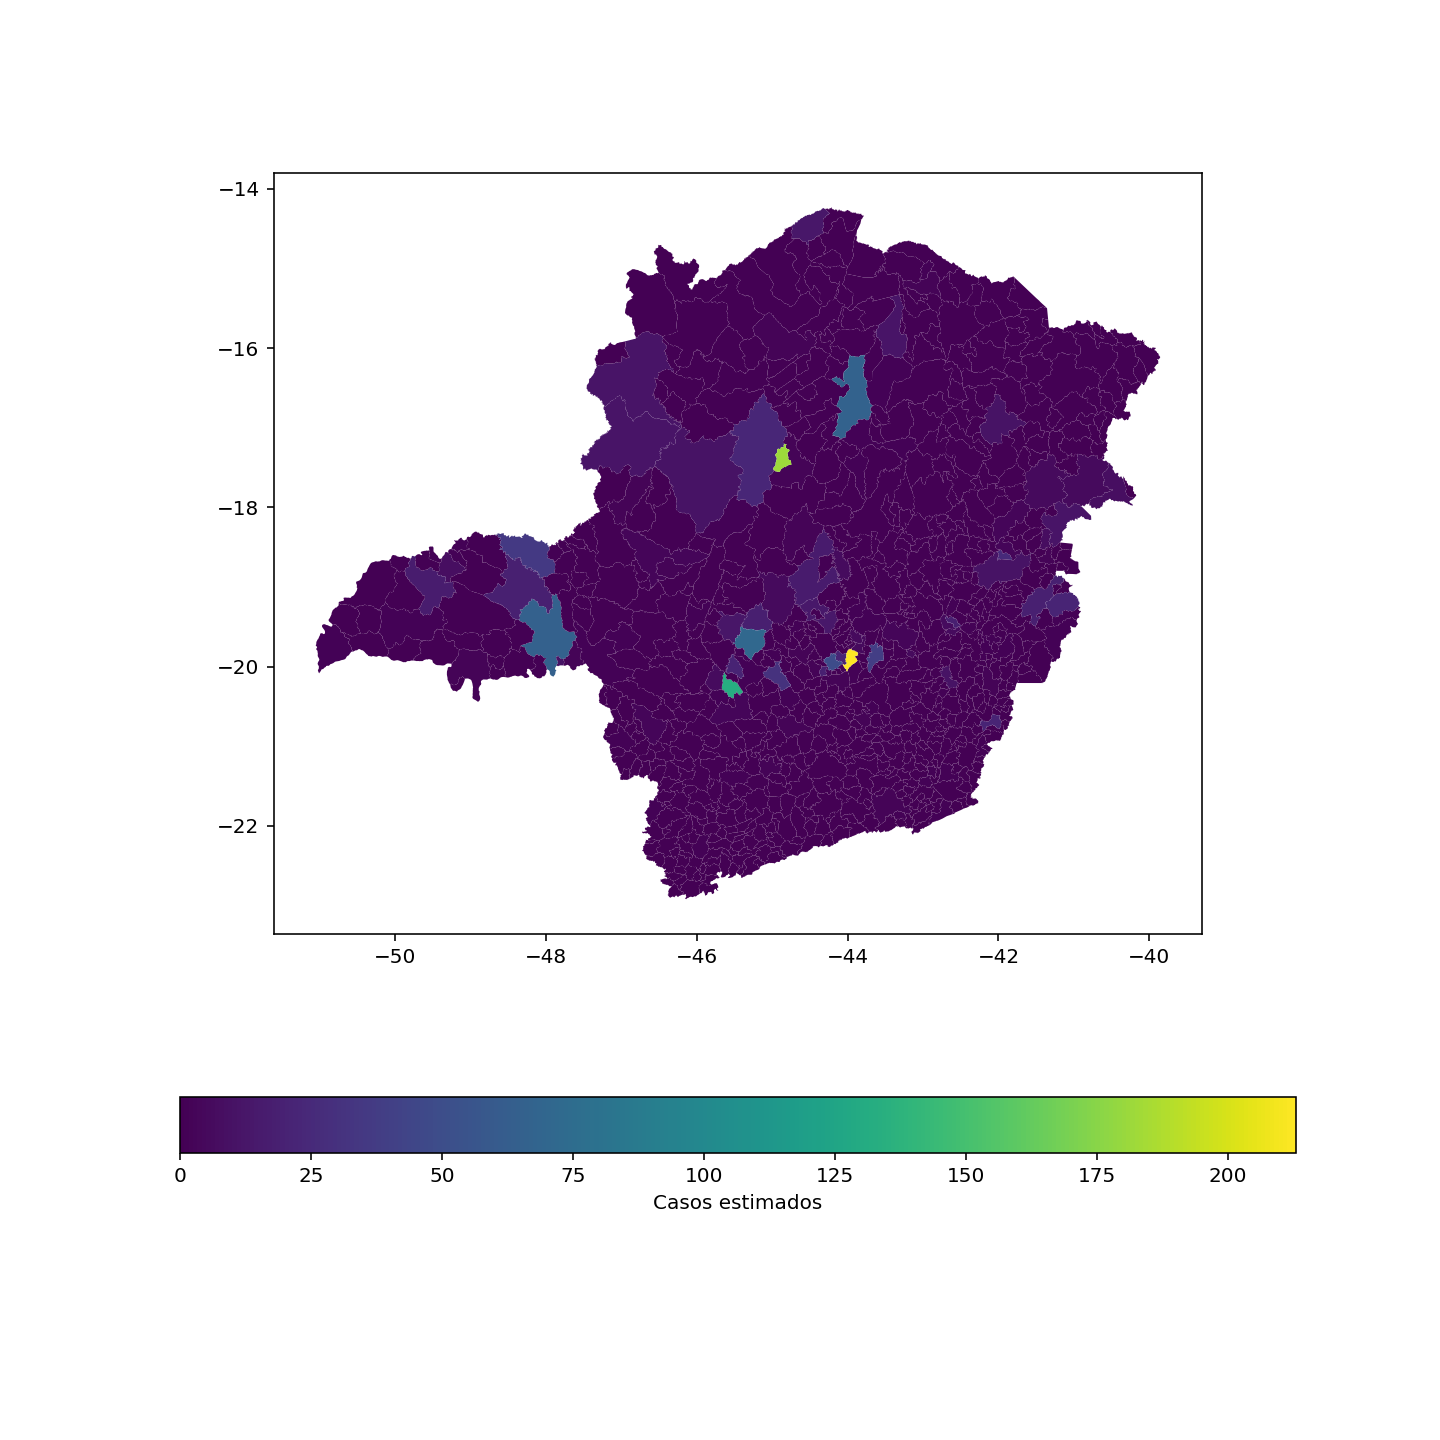
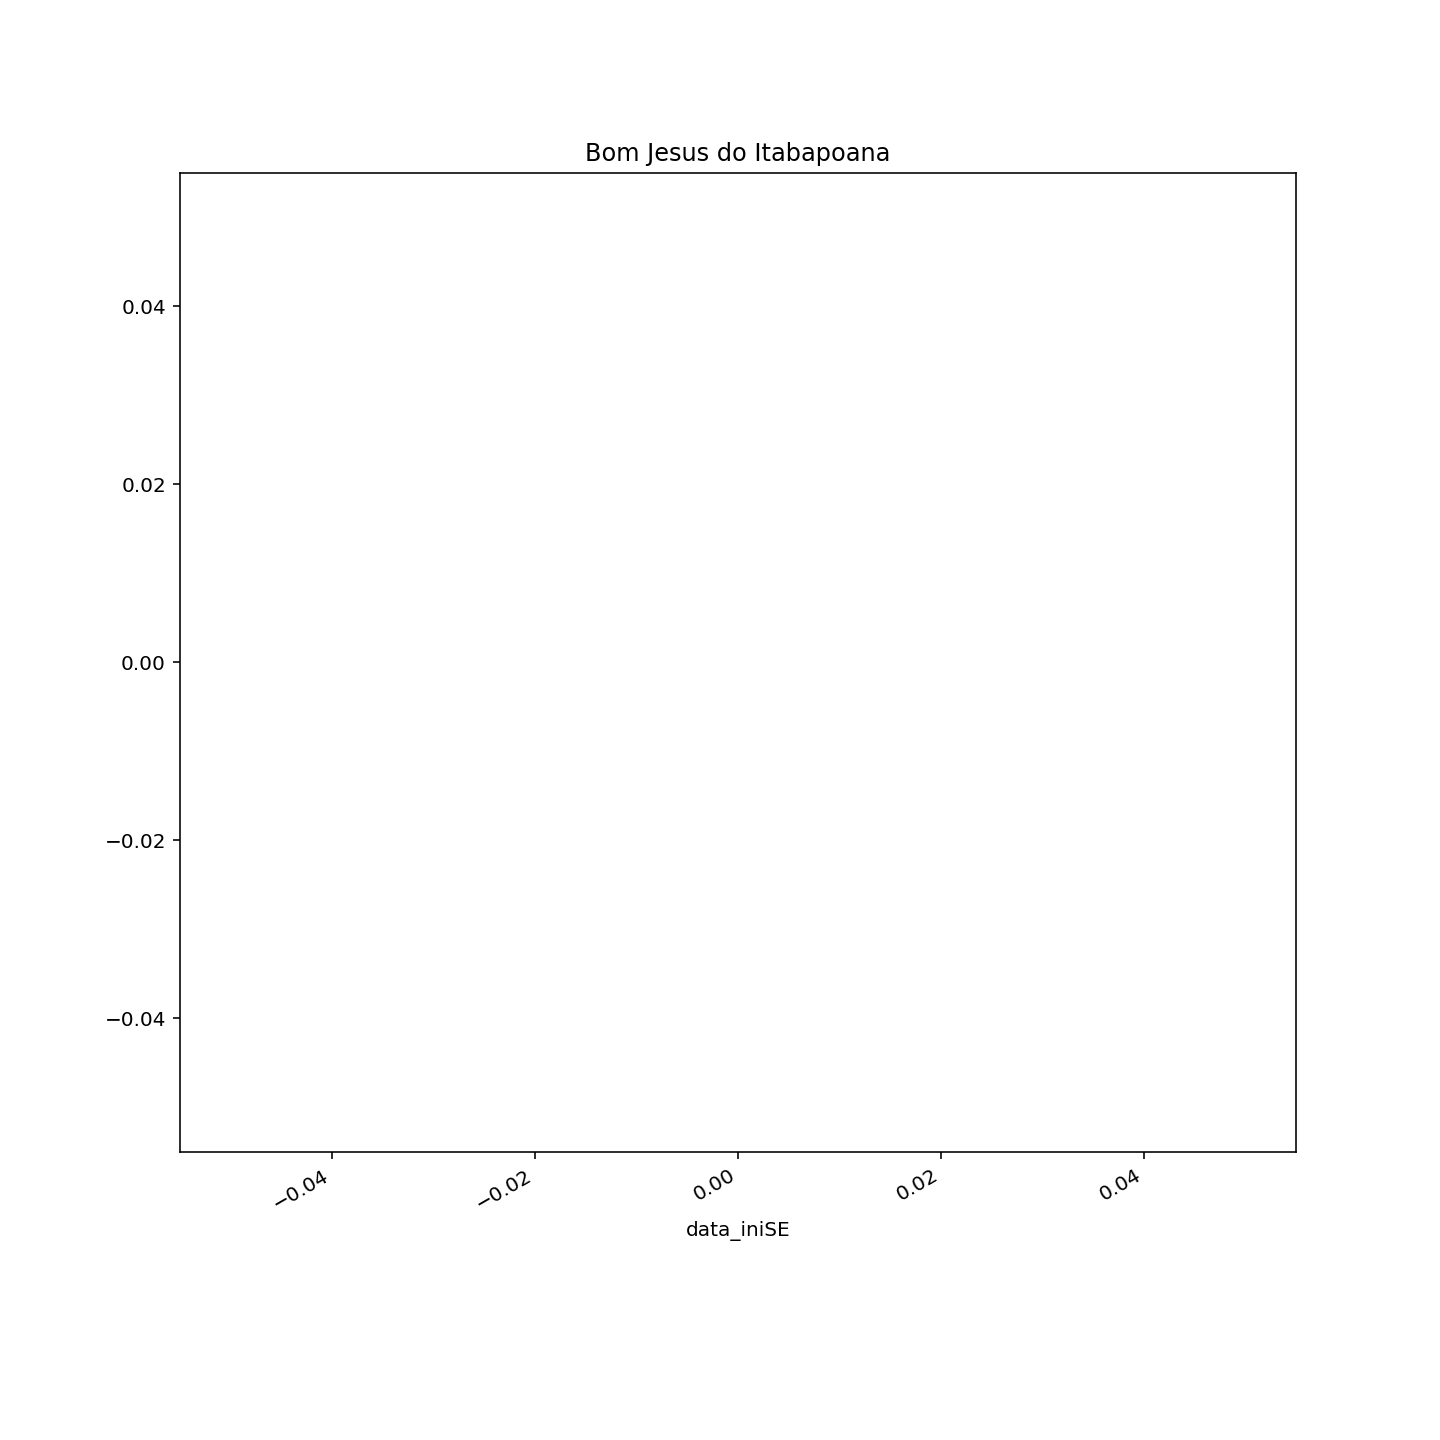

In [93]:
# state.servable(area='sidebar')
# date_slider.servable(area='sidebar')
# city.servable(area='sidebar')

Dash

In [81]:
plot_column.objects

[Markdown(str, sizing_mode='stretch_width'),
 Matplotlib(Figure, sizing_mode='stretch_width'),
 Matplotlib(Figure, sizing_mode='stretch_width')]